How is the salary affected by gender, education, job statisfaction and preferred programming language?

This is obviously a multivariate problem with a lot of interactions between the different feature. In this assignment you'll have to delv in as deep as possible until all relevant factors are covered.



In [1]:
import pandas as pd

In [2]:
sal = pd.read_csv('Salaries.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
sal

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN


In [4]:
sal.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

Since notes and status have more missing values , we are dropping them

Replacing the missing values of base pay and benefits with 0

In [5]:
sal.drop(['Notes', 'Status'], axis = 1,inplace=True)

In [6]:
sal.isna().sum()

Id                      0
EmployeeName            0
JobTitle                0
BasePay               605
OvertimePay             0
OtherPay                0
Benefits            36159
TotalPay                0
TotalPayBenefits        0
Year                    0
Agency                  0
dtype: int64

In [7]:
sal['BasePay']=sal['BasePay'].fillna(0)

In [8]:
sal['Benefits']=sal['Benefits'].fillna(0)

In [9]:
sal.isna().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

In [10]:
sal.drop("Id", axis=1, inplace=True)

In [11]:
sal1 = sal.groupby("JobTitle", as_index=False)

1. Plot a graph explaning the Median average income with respect to Job Title.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

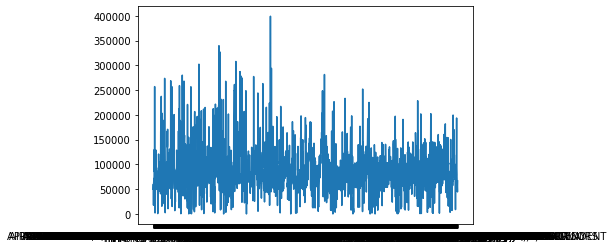

In [13]:
plt.plot("JobTitle", "TotalPay", data=sal1.median())
plt.show()

In [14]:
sal1 = pd.DataFrame(sal1.median().reset_index())

In [15]:
sal1.head()

,index,JobTitle,TotalPay,TotalPayBenefits,Year
0,0,ACCOUNT CLERK,49777.820,49777.820,2011.0
1,1,ACCOUNTANT,60076.240,60076.240,2011.0
2,2,ACCOUNTANT INTERN,17658.505,17658.505,2011.0
3,3,"ACPO,JuvP, Juv Prob (SFERS)",62290.780,80266.370,2014.0
4,4,ACUPUNCTURIST,67594.400,67594.400,2011.0


In [ ]:
2. What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?

In [16]:
sal[sal["TotalPay"]==sal["TotalPay"].min()]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
148653,Joe Lopez,"Counselor, Log Cabin Ranch",0.00,0.00,-618.13,0.00,-618.13,-618.13,2014,San Francisco


In [17]:
sal[sal["TotalPay"]==sal["TotalPay"].min()]["EmployeeName"]

148653    Joe Lopez
Name: EmployeeName, dtype: object

The strange thing I noticed about the result is that the salary value is in negative

In [ ]:
3. How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?)

In [18]:
saln =sal[sal["Year"]==2013]

In [19]:
sal2 = saln.groupby("JobTitle", as_index=False).count()

In [20]:
sal2

,JobTitle,EmployeeName,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,ASR Senior Office Specialist,21,21,21,21,21,21,21,21,21
1,ASR-Office Assistant,15,15,15,15,15,15,15,15,15
2,Account Clerk,90,90,90,90,90,90,90,90,90
3,Accountant I,3,3,3,3,3,3,3,3,3
4,Accountant II,77,77,77,77,77,77,77,77,77
...,...,...,...,...,...,...,...,...,...,...
1046,Wire Rope Cable Maint Sprv,1,1,1,1,1,1,1,1,1
1047,Worker's Comp Supervisor 1,3,3,3,3,3,3,3,3,3
1048,Worker's Compensation Adjuster,25,25,25,25,25,25,25,25,25
1049,X-Ray Laboratory Aide,34,34,34,34,34,34,34,34,34


In [22]:
sal2[sal2["EmployeeName"]==1].shape[0]

202

In [ ]:
4. How are base pay, overtime pay, and benefits allocated between different groups?

In [23]:
sal[["BasePay", "OvertimePay", "Benefits", "OtherPay"]] = sal[["BasePay", "OvertimePay", "Benefits", "OtherPay"]].replace("Not Provided", 0)

In [24]:
sal[["BasePay", "OvertimePay", "Benefits", "OtherPay"]] = sal[["BasePay", "OvertimePay", "Benefits", "OtherPay"]].astype(float)

In [25]:
sal3 = pd.DataFrame(sal.groupby("JobTitle").median().reset_index())

In [26]:
sal_bp = sal[["JobTitle", "BasePay"]].sort_values("BasePay", ascending=False)

In [27]:
sal_bp

,JobTitle,BasePay
72925,Chief of Police,319275.01
110532,Asst Med Examiner,318835.49
72929,"Dep Dir for Investments, Ret",315572.01
72926,"Chief, Fire Department",313686.01
72931,Executive Contract Employee,313312.52
...,...,...
72878,Junior Clerk,-101.88
72874,Junior Clerk,-106.60
72872,Junior Clerk,-109.22
72865,Junior Clerk,-121.63


In [28]:
sal_ot = sal[["JobTitle", "OvertimePay"]].sort_values("OvertimePay", ascending=False)


In [29]:
sal_ot

,JobTitle,OvertimePay
1,CAPTAIN III (POLICE DEPARTMENT),245131.88
36159,"Lieutenant, Fire Suppression",220909.48
72964,Deputy Sheriff,196689.18
36163,EMT/Paramedic/Firefighter,192424.49
110574,Deputy Sheriff,173547.73
...,...,...
66654,Police Officer,0.00
66653,Sheriff's Property Keeper,0.00
66651,Special Nurse,0.00
148653,"Counselor, Log Cabin Ranch",0.00


In [30]:
sal_ben = sal[["JobTitle", "Benefits"]].sort_values("Benefits", ascending=False)


In [31]:
sal_ben

,JobTitle,Benefits
110533,Chief Investment Officer,96570.66
110534,Chief of Police,91302.46
110535,"Chief, Fire Department",91201.66
110537,Dept Head V,89772.32
110532,Asst Med Examiner,89540.23
...,...,...
110526,PS Aide Health Services,0.00
110528,Police Officer 3,-2.73
110529,Police Officer 3,-8.20
144099,Secretary 2,-13.80


In [ ]:
5. Is there any evidence of pay discrimination based on gender in this dataset?

We cannot answer this question because data about the gender of the employees are not given

In [ ]:
6. How is budget allocated based on different groups and responsibilities?

In [54]:
sal.groupby(['JobTitle'])['TotalPay'].agg('sum')

In [ ]:
7. Build a Regression based model to predict the salary given the independant variables.

In [32]:
sal

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,San Francisco
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,San Francisco
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,San Francisco
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,San Francisco
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,San Francisco
...,...,...,...,...,...,...,...,...,...,...
148649,Roy I Tillery,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,San Francisco
148650,Not provided,Not provided,0.00,0.00,0.00,0.0,0.00,0.00,2014,San Francisco
148651,Not provided,Not provided,0.00,0.00,0.00,0.0,0.00,0.00,2014,San Francisco
148652,Not provided,Not provided,0.00,0.00,0.00,0.0,0.00,0.00,2014,San Francisco


REMOVING EMPLOYEE NAMES WHICH HAS UNIQUE VALUES

In [33]:
sal.drop("EmployeeName", axis=1, inplace=True)

We are using label encoding to transform the ordinal variables

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le1 = LabelEncoder()
le2 = LabelEncoder()
sal["JobTitle"] = le.fit_transform(sal["JobTitle"])
sal["Year"] = le2.fit_transform(sal["Year"])

In [35]:
sal

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,831,167411.18,0.00,400184.25,0.0,567595.43,567595.43,0,0
1,293,155966.02,245131.88,137811.38,0.0,538909.28,538909.28,0,0
2,293,212739.13,106088.18,16452.60,0.0,335279.91,335279.91,0,0
3,2125,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,0,0
4,576,134401.60,9737.00,182234.59,0.0,326373.19,326373.19,0,0
...,...,...,...,...,...,...,...,...,...
148649,562,0.00,0.00,0.00,0.0,0.00,0.00,3,0
148650,1274,0.00,0.00,0.00,0.0,0.00,0.00,3,0
148651,1274,0.00,0.00,0.00,0.0,0.00,0.00,3,0
148652,1274,0.00,0.00,0.00,0.0,0.00,0.00,3,0


In [36]:
sal.dropna(subset=["BasePay", "OtherPay"], inplace=True)

SETTING DEPENDANT AND INDEPENDANT VARIABLES

In [38]:
X = sal[["JobTitle", "Year"]]

In [39]:
y = sal["BasePay"].values

In [ ]:
SPLITING THE DATA

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.3)

NORMALIZING THE VARIABLES

In [41]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
ss = StandardScaler()
mm = MinMaxScaler()
ss.fit_transform(X_train)
ss.transform(X_test)
mm.fit_transform(y_train.reshape(-1,1))
mm.transform(y_test.reshape(-1,1))

array([[0.00631115],
       [0.18363985],
       [0.15239561],
       ...,
       [0.00363065],
       [0.00229247],
       [0.38893192]])

LINEAR REGRESSION MODEL

In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


In [43]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.0233045725215425

RANDOM FORREST REGRESSION MODEL

In [46]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred1 = rf.predict(X_test)

In [47]:
r2_score(y_test, y_pred1)

0.66357444371305

In [ ]:
8. let's define lists to score errors and k-values